# PROJECT-3 : INSTAGRAM INFLUENCERS


Instagram is an American photo and video sharing social networking service founded in 2010 byKevin Systrom and Mike Krieger, and later acquired by American company Facebook Inc., nowknown as Meta Platforms. The app allows users to share posts that can be shared publicly orwith pre-approved followers.Instagram is very much used to influence people  in a particular way for a specific issue - whichcan impact the order in some ways. The following dataset is about such influencers. The fieldsin the given dataset are as follows:

It contains the following 10 fields:
1. rank : Rank of the Influencer
2. channel_info : Username of the Instagrammer
3. influence_score : Influence score of the users
4. posts : Number of posts they have made so far
5. followers : Number of followers of the user
6. avg_likes : Average likes on instagrammer posts
7. 60dayeng_rate : Last 60 days engagement rate of instagrammer as faction of engagements they have done so
                   far
8. newpostavg_like : Average likes they have on new posts
9. total_likes : Total likes the user has got on their posts. (inBillion)
10. country : Country or region of origin of the user

Answer the following questions based on the given data set:
1. Are there any correlated features in the given dataset? If yes, state the correlationc oefficient of the pair of features which are highly correlated.

2. What is the frequency distribution of the following features?
   ○ Influence Score
   ○ Followers
   ○ Posts

3. Which country houses the highest number of Instagram Influencers? Please show the count of Instagram influencers in different countries using barchart.

4. Who are the top 10 influencers in the given dataset based on the following features ?
      ● Followers
      ● Average likes
      ● Total Likes
      
5. Describe the relationship between the following pairs of features using a suitable graph ?
       ● Followers and Total Likes
       ● Followers and Influence Score
       ● Posts and Average likes
       ● Posts and Influence Score

### Importing Libraries and Dataset

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Importing Dataset

In [2]:
df = pd.read_csv(r'C:\Users\aasth\OneDrive\Desktop\Guvi_Projects_Module_21\dataset\Influencer.csv')
df

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,\nkhabib_nurmagomedov,63,33.6m,680.6k,4.6k,0.009,305.7k,3.1b,Russia
196,197,\ndanbilzerian,84,33.6m,2.2m,1.4k,0.064,2.1m,3.0b,Canada
197,198,\nraisa6690,80,33.6m,227.8k,4.2k,0.003,103.2k,955.9m,Indonesia
198,199,\nluansantana,79,33.5m,193.3k,865,0.003,82.6k,167.2m,Brazil


In [3]:
df.dtypes

Rank                     int64
Channel Info            object
Influence Score          int64
Followers               object
Avg. Likes              object
Posts                   object
60-Day Eng Rate        float64
New Post Avg. Likes     object
Total Likes             object
Country Or Region       object
dtype: object

### Data Preprocessing

Converting 'k' into 1000 , 'm' into million and 'b' into billion

In [4]:
def convert(ls):
    l =[]
    for f in ls :
        if 'k' in f:
            n = round(1000*float(f.replace('k','')),0)
        if 'm' in f:
            n = round(1000000*float(f.replace('m','')),0)
        if 'b' in f:
            n = round(1000000000*float(f.replace('b','')),0)
        l.append(n)
    return l


In [5]:
followers = df['Followers'].to_list()
df['Followers_1'] = convert(followers)

avg_likes = df['Avg. Likes'].to_list()
df['Avg. Likes_1'] = convert(avg_likes)

posts = df['Posts'].to_list()
df['Posts_1'] = convert(posts)

new_post_avg_likes = df['New Post Avg. Likes'].to_list()
df['New Post Avg. Likes_1'] = convert(new_post_avg_likes)

total_likes = df['Total Likes'].to_list()
df['Total Likes_1'] = convert(total_likes)

df

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region,Followers_1,Avg. Likes_1,Posts_1,New Post Avg. Likes_1,Total Likes_1
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain,485200000.0,8700000.0,3400.0,6300000.0,2.910000e+10
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States,370700000.0,8200000.0,7000.0,5000000.0,5.740000e+10
2,3,\nleomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN,363900000.0,6700000.0,7000.0,3500000.0,6.100000e+09
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States,348800000.0,6100000.0,1900.0,1700000.0,1.140000e+10
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States,339400000.0,1800000.0,6800.0,932000.0,1.260000e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,\nkhabib_nurmagomedov,63,33.6m,680.6k,4.6k,0.009,305.7k,3.1b,Russia,33600000.0,680600.0,4600.0,305700.0,3.100000e+09
196,197,\ndanbilzerian,84,33.6m,2.2m,1.4k,0.064,2.1m,3.0b,Canada,33600000.0,2200000.0,1400.0,2100000.0,3.000000e+09
197,198,\nraisa6690,80,33.6m,227.8k,4.2k,0.003,103.2k,955.9m,Indonesia,33600000.0,227800.0,4200.0,103200.0,9.559000e+08
198,199,\nluansantana,79,33.5m,193.3k,865,0.003,82.6k,167.2m,Brazil,33500000.0,193300.0,4200.0,82600.0,1.672000e+08


Removing '\n' in Channel Info 

In [6]:
names =[]
for name in df['Channel Info'].to_list():
    name = name.replace('\n','')
    names.append(name)

df['Channel Info'] = names
df
    

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region,Followers_1,Avg. Likes_1,Posts_1,New Post Avg. Likes_1,Total Likes_1
0,1,cristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain,485200000.0,8700000.0,3400.0,6300000.0,2.910000e+10
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States,370700000.0,8200000.0,7000.0,5000000.0,5.740000e+10
2,3,leomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN,363900000.0,6700000.0,7000.0,3500000.0,6.100000e+09
3,4,selenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States,348800000.0,6100000.0,1900.0,1700000.0,1.140000e+10
4,5,therock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States,339400000.0,1800000.0,6800.0,932000.0,1.260000e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,khabib_nurmagomedov,63,33.6m,680.6k,4.6k,0.009,305.7k,3.1b,Russia,33600000.0,680600.0,4600.0,305700.0,3.100000e+09
196,197,danbilzerian,84,33.6m,2.2m,1.4k,0.064,2.1m,3.0b,Canada,33600000.0,2200000.0,1400.0,2100000.0,3.000000e+09
197,198,raisa6690,80,33.6m,227.8k,4.2k,0.003,103.2k,955.9m,Indonesia,33600000.0,227800.0,4200.0,103200.0,9.559000e+08
198,199,luansantana,79,33.5m,193.3k,865,0.003,82.6k,167.2m,Brazil,33500000.0,193300.0,4200.0,82600.0,1.672000e+08


In [8]:
df.to_csv("raw_data.csv")
df.fillna(df['Country Or Region'].mode()[0],inplace=True)

In [9]:
df.isnull().sum()

Rank                     0
Channel Info             0
Influence Score          0
Followers                0
Avg. Likes               0
Posts                    0
60-Day Eng Rate          0
New Post Avg. Likes      0
Total Likes              0
Country Or Region        0
Followers_1              0
Avg. Likes_1             0
Posts_1                  0
New Post Avg. Likes_1    0
Total Likes_1            0
dtype: int64

Dropping old columns

In [7]:
df1 = df.copy()
df1.drop(['Followers','Avg. Likes','Posts','New Post Avg. Likes','Total Likes'],axis=1,inplace=True)
df1

,Rank,Channel Info,Influence Score,60-Day Eng Rate,Country Or Region,Followers_1,Avg. Likes_1,Posts_1,New Post Avg. Likes_1,Total Likes_1
0,1,cristiano,92,0.013,Spain,485200000.0,8700000.0,3400.0,6300000.0,2.910000e+10
1,2,kyliejenner,91,0.014,United States,370700000.0,8200000.0,7000.0,5000000.0,5.740000e+10
2,3,leomessi,90,0.010,NaN,363900000.0,6700000.0,7000.0,3500000.0,6.100000e+09
3,4,selenagomez,93,0.005,United States,348800000.0,6100000.0,1900.0,1700000.0,1.140000e+10
4,5,therock,91,0.003,United States,339400000.0,1800000.0,6800.0,932000.0,1.260000e+10
...,...,...,...,...,...,...,...,...,...,...
195,196,khabib_nurmagomedov,63,0.009,Russia,33600000.0,680600.0,4600.0,305700.0,3.100000e+09
196,197,danbilzerian,84,0.064,Canada,33600000.0,2200000.0,1400.0,2100000.0,3.000000e+09
197,198,raisa6690,80,0.003,Indonesia,33600000.0,227800.0,4200.0,103200.0,9.559000e+08
198,199,luansantana,79,0.003,Brazil,33500000.0,193300.0,4200.0,82600.0,1.672000e+08


##### Imputing Null Values

In [8]:
df1.isnull().sum()

Rank                      0
Channel Info              0
Influence Score           0
60-Day Eng Rate           0
Country Or Region        63
Followers_1               0
Avg. Likes_1              0
Posts_1                   0
New Post Avg. Likes_1     0
Total Likes_1             0
dtype: int64

Since Country , a categorical column has null values, so we will impute it using "mode"

In [9]:
df1.fillna(df1['Country Or Region'].mode()[0],inplace=True)
df1

,Rank,Channel Info,Influence Score,60-Day Eng Rate,Country Or Region,Followers_1,Avg. Likes_1,Posts_1,New Post Avg. Likes_1,Total Likes_1
0,1,cristiano,92,0.013,Spain,485200000.0,8700000.0,3400.0,6300000.0,2.910000e+10
1,2,kyliejenner,91,0.014,United States,370700000.0,8200000.0,7000.0,5000000.0,5.740000e+10
2,3,leomessi,90,0.010,United States,363900000.0,6700000.0,7000.0,3500000.0,6.100000e+09
3,4,selenagomez,93,0.005,United States,348800000.0,6100000.0,1900.0,1700000.0,1.140000e+10
4,5,therock,91,0.003,United States,339400000.0,1800000.0,6800.0,932000.0,1.260000e+10
...,...,...,...,...,...,...,...,...,...,...
195,196,khabib_nurmagomedov,63,0.009,Russia,33600000.0,680600.0,4600.0,305700.0,3.100000e+09
196,197,danbilzerian,84,0.064,Canada,33600000.0,2200000.0,1400.0,2100000.0,3.000000e+09
197,198,raisa6690,80,0.003,Indonesia,33600000.0,227800.0,4200.0,103200.0,9.559000e+08
198,199,luansantana,79,0.003,Brazil,33500000.0,193300.0,4200.0,82600.0,1.672000e+08


In [10]:
df1.isnull().sum()

Rank                     0
Channel Info             0
Influence Score          0
60-Day Eng Rate          0
Country Or Region        0
Followers_1              0
Avg. Likes_1             0
Posts_1                  0
New Post Avg. Likes_1    0
Total Likes_1            0
dtype: int64

##### Handling Skewness

In [11]:
df2 = df1.copy()

In [12]:
# Finding Numerical and Categorical columns
def find_num_cat_columns(df):
    numerical_cols = df.select_dtypes(include=['float64', 'int64','int32']).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    return numerical_cols, categorical_cols

In [14]:
numerical , categorical = find_num_cat_columns(df2)
print("Numerical Columns : " ,numerical , "\nCategorical Columns : " ,categorical)

Numerical Columns :  ['Rank', 'Influence Score', '60-Day Eng Rate', 'Followers_1', 'Avg. Likes_1', 'Posts_1', 'New Post Avg. Likes_1', 'Total Likes_1'] 
Categorical Columns :  ['Channel Info', 'Country Or Region']


In [15]:
def plot(df, column):
    plt.subplot(1,3,1)
    plt.title(f'Hist & Violin Plot : {column}')
    sns.histplot(data=df, x=column, kde=True, bins=50)

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.legend(labels=["Skewness: %.2f"%(df[column].skew())])
    plt.show()

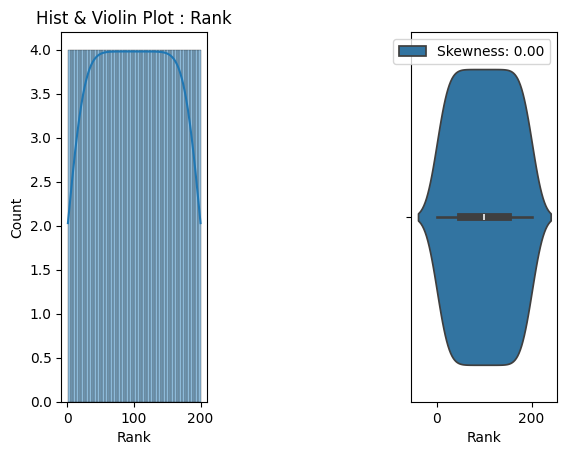

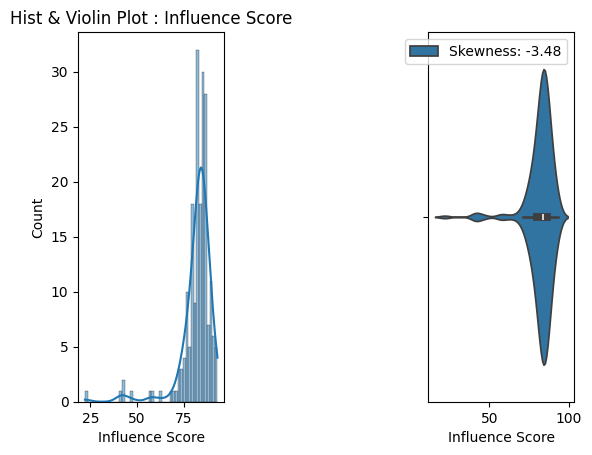

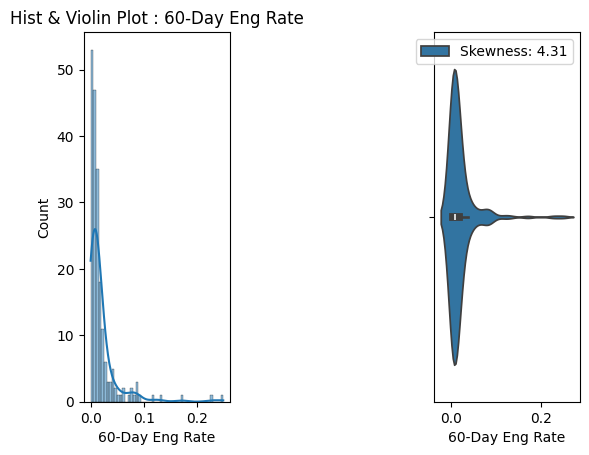

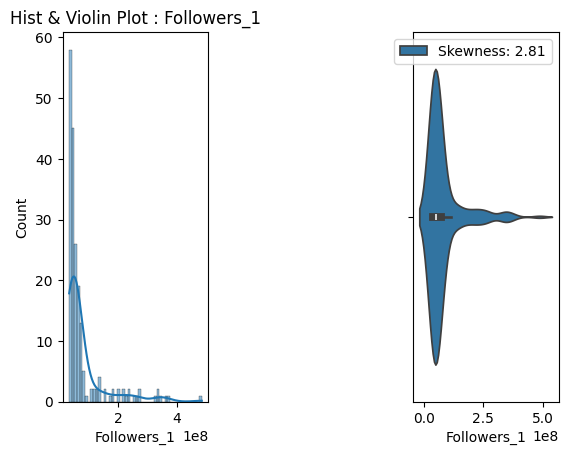

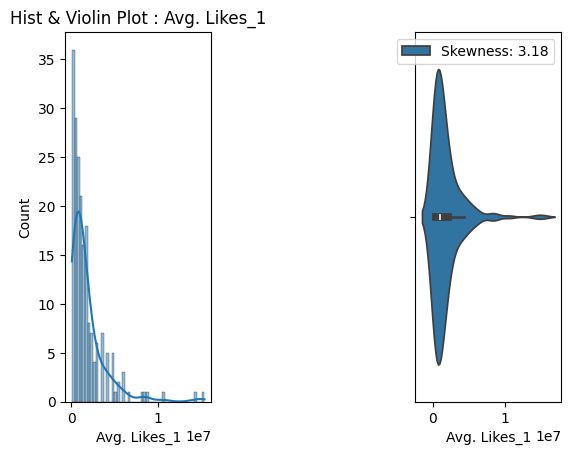

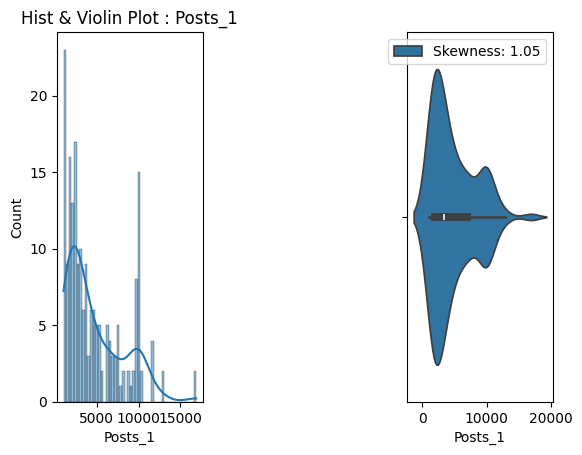

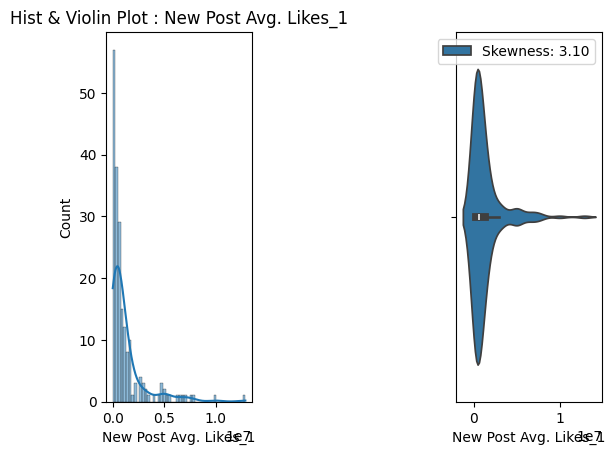

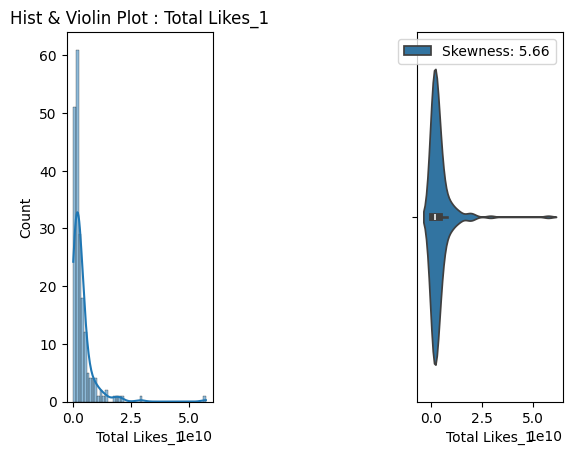

In [16]:
for i in numerical:
    plot(df2, i)

In [17]:
def add_log_transform(df,col):
    return np.log(df[df[col]>0][col])

In [18]:
df2['60day_eng_rate_log'] = add_log_transform(df2,'60-Day Eng Rate')
df2['followers_log'] = add_log_transform(df2,'Followers_1')
df2['avg_likes_log'] = add_log_transform(df2,'Avg. Likes_1')
df2['posts_log'] = add_log_transform(df2,'Posts_1')
df2['new_posts_avg_likes_log'] = add_log_transform(df2,'New Post Avg. Likes_1')
df2['total_likes_log'] = add_log_transform(df2,'Total Likes_1')
df2

,Rank,Channel Info,Influence Score,60-Day Eng Rate,Country Or Region,Followers_1,Avg. Likes_1,Posts_1,New Post Avg. Likes_1,Total Likes_1,60day_eng_rate_log,followers_log,avg_likes_log,posts_log,new_posts_avg_likes_log,total_likes_log
0,1,cristiano,92,0.013,Spain,485200000.0,8700000.0,3400.0,6300000.0,2.910000e+10,-4.342806,20.000072,15.978834,8.131531,15.656060,24.094004
1,2,kyliejenner,91,0.014,United States,370700000.0,8200000.0,7000.0,5000000.0,5.740000e+10,-4.268698,19.730904,15.919645,8.853665,15.424948,24.773310
2,3,leomessi,90,0.010,United States,363900000.0,6700000.0,7000.0,3500000.0,6.100000e+09,-4.605170,19.712390,15.717618,8.853665,15.068274,22.531555
3,4,selenagomez,93,0.005,United States,348800000.0,6100000.0,1900.0,1700000.0,1.140000e+10,-5.298317,19.670009,15.623799,7.549609,14.346139,23.156879
4,5,therock,91,0.003,United States,339400000.0,1800000.0,6800.0,932000.0,1.260000e+10,-5.809143,19.642690,14.403297,8.824678,13.745088,23.256963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,khabib_nurmagomedov,63,0.009,Russia,33600000.0,680600.0,4600.0,305700.0,3.100000e+09,-4.710531,17.330037,13.430730,8.433812,12.630360,21.854668
196,197,danbilzerian,84,0.064,Canada,33600000.0,2200000.0,1400.0,2100000.0,3.000000e+09,-2.748872,17.330037,14.603968,7.244228,14.557448,21.821878
197,198,raisa6690,80,0.003,Indonesia,33600000.0,227800.0,4200.0,103200.0,9.559000e+08,-5.809143,17.330037,12.336223,8.342840,11.544424,20.678164
198,199,luansantana,79,0.003,Brazil,33500000.0,193300.0,4200.0,82600.0,1.672000e+08,-5.809143,17.327056,12.171999,8.342840,11.321765,18.934701


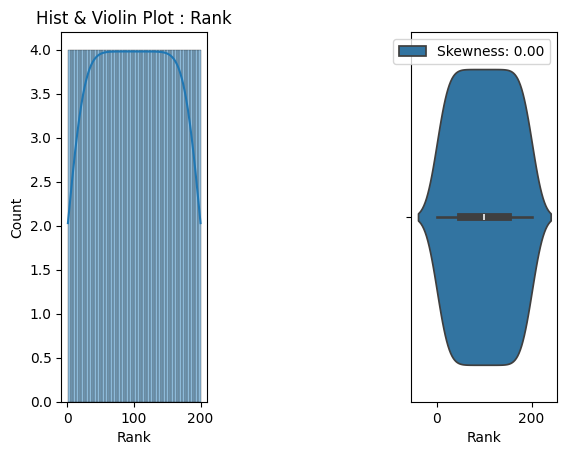

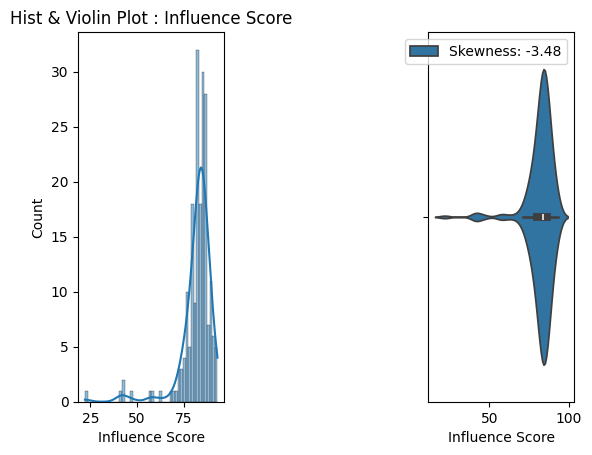

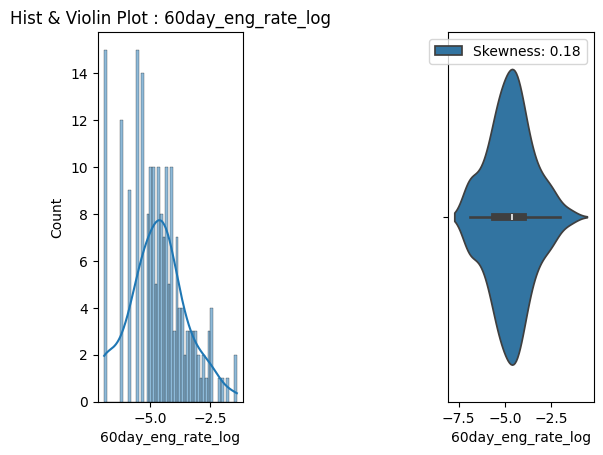

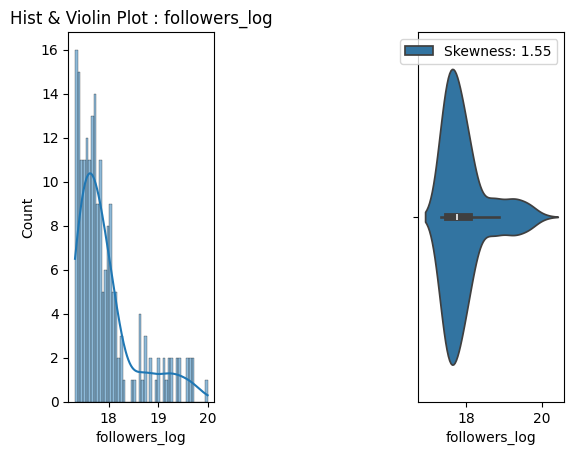

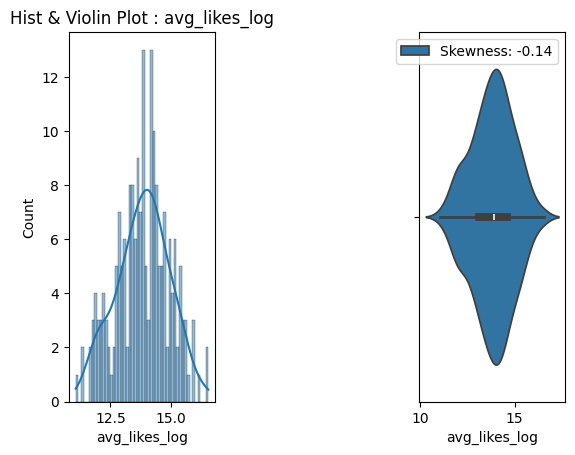

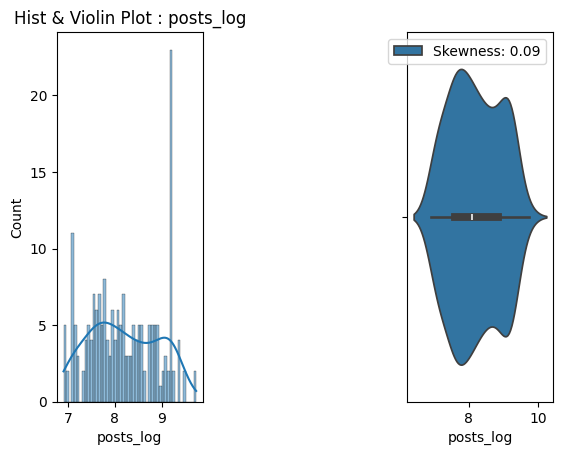

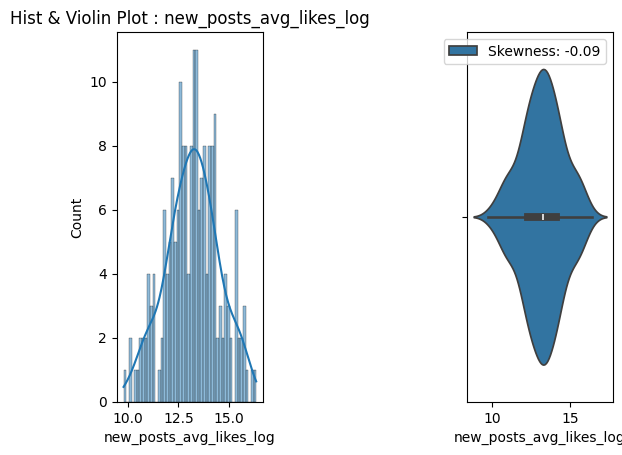

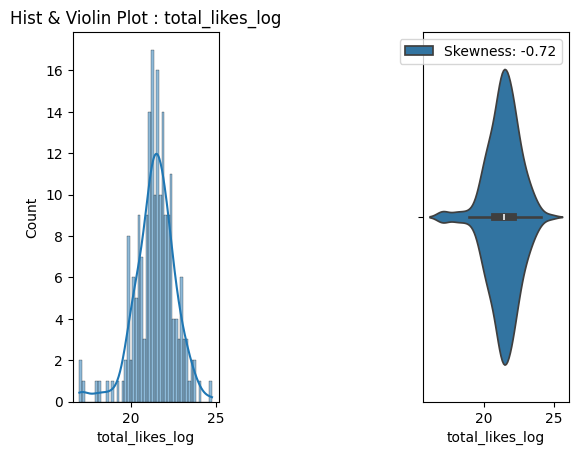

In [19]:
columns = ['Rank','Influence Score','60day_eng_rate_log','followers_log','avg_likes_log','posts_log','new_posts_avg_likes_log','total_likes_log']
for i in columns:
    plot(df2, i)

In [20]:
numerical , categorical = find_num_cat_columns(df2)
print("Numerical Columns : " ,numerical , "\nCategorical Columns : " ,categorical)

Numerical Columns :  ['Rank', 'Influence Score', '60-Day Eng Rate', 'Followers_1', 'Avg. Likes_1', 'Posts_1', 'New Post Avg. Likes_1', 'Total Likes_1', '60day_eng_rate_log', 'followers_log', 'avg_likes_log', 'posts_log', 'new_posts_avg_likes_log', 'total_likes_log'] 
Categorical Columns :  ['Channel Info', 'Country Or Region']


In [21]:
# Dropping off the columns which are skewed
df3 = df2.copy()
df3.drop(['60-Day Eng Rate', 'Followers_1', 'Avg. Likes_1', 'Posts_1', 'New Post Avg. Likes_1', 'Total Likes_1'],axis=1,inplace=True)
df3

,Rank,Channel Info,Influence Score,Country Or Region,60day_eng_rate_log,followers_log,avg_likes_log,posts_log,new_posts_avg_likes_log,total_likes_log
0,1,cristiano,92,Spain,-4.342806,20.000072,15.978834,8.131531,15.656060,24.094004
1,2,kyliejenner,91,United States,-4.268698,19.730904,15.919645,8.853665,15.424948,24.773310
2,3,leomessi,90,United States,-4.605170,19.712390,15.717618,8.853665,15.068274,22.531555
3,4,selenagomez,93,United States,-5.298317,19.670009,15.623799,7.549609,14.346139,23.156879
4,5,therock,91,United States,-5.809143,19.642690,14.403297,8.824678,13.745088,23.256963
...,...,...,...,...,...,...,...,...,...,...
195,196,khabib_nurmagomedov,63,Russia,-4.710531,17.330037,13.430730,8.433812,12.630360,21.854668
196,197,danbilzerian,84,Canada,-2.748872,17.330037,14.603968,7.244228,14.557448,21.821878
197,198,raisa6690,80,Indonesia,-5.809143,17.330037,12.336223,8.342840,11.544424,20.678164
198,199,luansantana,79,Brazil,-5.809143,17.327056,12.171999,8.342840,11.321765,18.934701


##### Handling Outliers

In [26]:
df4 = df3.copy()

In [27]:
numerical , categorical = find_num_cat_columns(df4)
print("Numerical Columns : " ,numerical , "\nCategorical Columns : " ,categorical)

Numerical Columns :  ['Rank', 'Influence Score', '60day_eng_rate_log', 'followers_log', 'avg_likes_log', 'posts_log', 'new_posts_avg_likes_log', 'total_likes_log'] 
Categorical Columns :  ['Channel Info', 'Country Or Region']


In [28]:
def find_outliers(df,col):
    for i in col:
        plt.figure(figsize=(5, 3))  
        sns.boxplot(data=df, x=i)
        plt.title(f'Boxplot of {i}')
        plt.xlabel(i)
        plt.show()

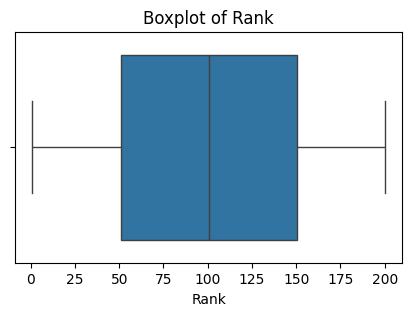

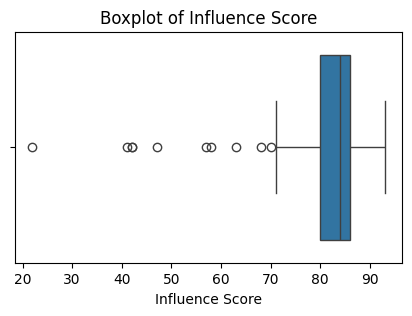

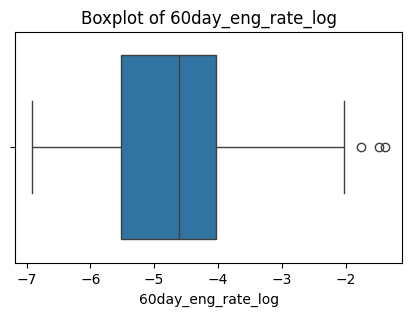

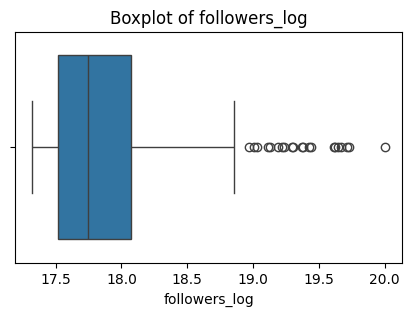

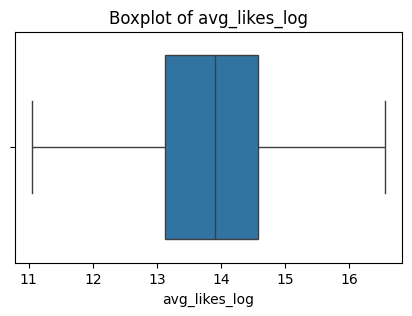

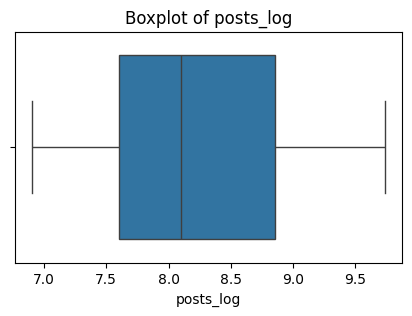

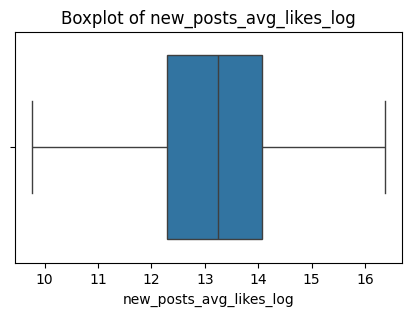

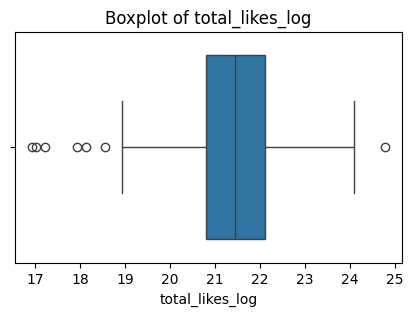

In [29]:
find_outliers(df4,numerical)

We find that the columns "Influence Score" , "60day_eng_rate_log" , "followers_log" , "total_likes_log" have outliers, so we need to handle them

In [30]:
def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [31]:
outlier(df4,'Influence Score')
outlier(df4,'60day_eng_rate_log')
outlier(df4,'followers_log')
outlier(df4,'total_likes_log')

df4

,Rank,Channel Info,Influence Score,Country Or Region,60day_eng_rate_log,followers_log,avg_likes_log,posts_log,new_posts_avg_likes_log,total_likes_log
0,1,cristiano,92,Spain,-4.342806,18.896123,15.978834,8.131531,15.656060,24.094004
1,2,kyliejenner,91,United States,-4.268698,18.896123,15.919645,8.853665,15.424948,24.097211
2,3,leomessi,90,United States,-4.605170,18.896123,15.717618,8.853665,15.068274,22.531555
3,4,selenagomez,93,United States,-5.298317,18.896123,15.623799,7.549609,14.346139,23.156879
4,5,therock,91,United States,-5.809143,18.896123,14.403297,8.824678,13.745088,23.256963
...,...,...,...,...,...,...,...,...,...,...
195,196,khabib_nurmagomedov,71,Russia,-4.710531,17.330037,13.430730,8.433812,12.630360,21.854668
196,197,danbilzerian,84,Canada,-2.748872,17.330037,14.603968,7.244228,14.557448,21.821878
197,198,raisa6690,80,Indonesia,-5.809143,17.330037,12.336223,8.342840,11.544424,20.678164
198,199,luansantana,79,Brazil,-5.809143,17.327056,12.171999,8.342840,11.321765,18.934701


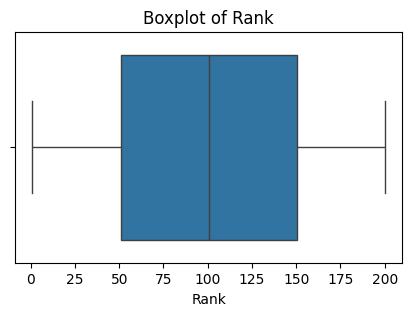

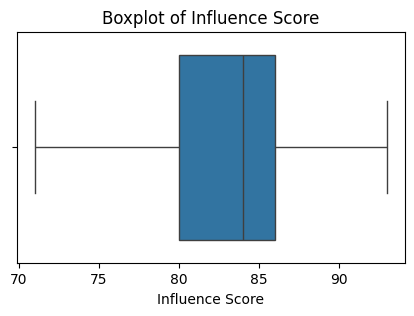

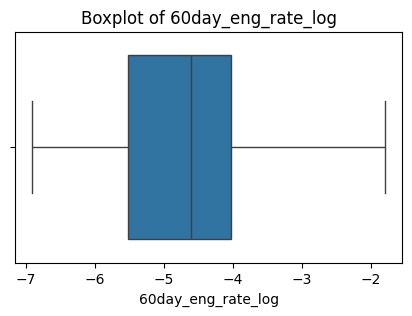

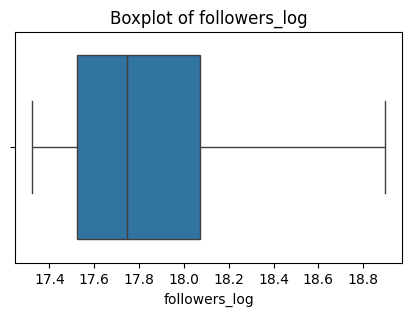

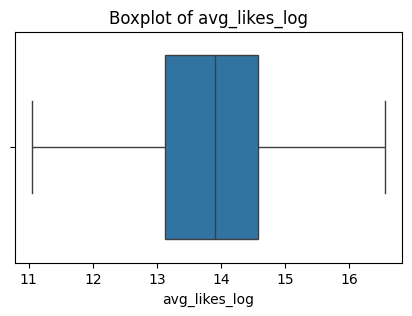

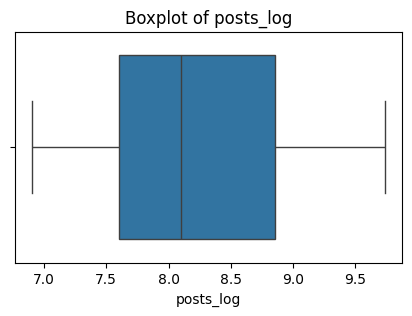

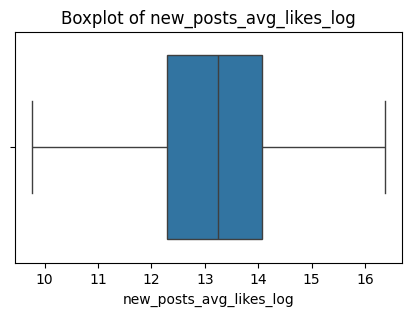

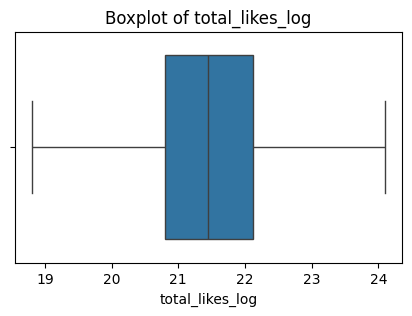

In [32]:
find_outliers(df4,numerical)

In [33]:
df4.isnull().sum()

Rank                       0
Channel Info               0
Influence Score            0
Country Or Region          0
60day_eng_rate_log         2
followers_log              0
avg_likes_log              0
posts_log                  0
new_posts_avg_likes_log    0
total_likes_log            0
dtype: int64

Since the column '60day_eng_rate_log' has 2 null values so replacing it with mean as this column has no outliers

In [34]:
df4.fillna(df4['60day_eng_rate_log'].mean(),inplace=True)
df4

,Rank,Channel Info,Influence Score,Country Or Region,60day_eng_rate_log,followers_log,avg_likes_log,posts_log,new_posts_avg_likes_log,total_likes_log
0,1,cristiano,92,Spain,-4.342806,18.896123,15.978834,8.131531,15.656060,24.094004
1,2,kyliejenner,91,United States,-4.268698,18.896123,15.919645,8.853665,15.424948,24.097211
2,3,leomessi,90,United States,-4.605170,18.896123,15.717618,8.853665,15.068274,22.531555
3,4,selenagomez,93,United States,-5.298317,18.896123,15.623799,7.549609,14.346139,23.156879
4,5,therock,91,United States,-5.809143,18.896123,14.403297,8.824678,13.745088,23.256963
...,...,...,...,...,...,...,...,...,...,...
195,196,khabib_nurmagomedov,71,Russia,-4.710531,17.330037,13.430730,8.433812,12.630360,21.854668
196,197,danbilzerian,84,Canada,-2.748872,17.330037,14.603968,7.244228,14.557448,21.821878
197,198,raisa6690,80,Indonesia,-5.809143,17.330037,12.336223,8.342840,11.544424,20.678164
198,199,luansantana,79,Brazil,-5.809143,17.327056,12.171999,8.342840,11.321765,18.934701


In [35]:
df4.isnull().sum()

Rank                       0
Channel Info               0
Influence Score            0
Country Or Region          0
60day_eng_rate_log         0
followers_log              0
avg_likes_log              0
posts_log                  0
new_posts_avg_likes_log    0
total_likes_log            0
dtype: int64

### EDA Questions and Answers

In [36]:
df5 = df4.copy()

##### Q.1) Are there any correlated features in the given dataset? If yes, state the correlation coefficient of the pair of features which are highly correlated.

In [37]:
columns = ['Rank','Influence Score','60day_eng_rate_log','followers_log','avg_likes_log','posts_log','new_posts_avg_likes_log','total_likes_log']
correlation_matrix = df5[columns].corr()
correlation_matrix

,Rank,Influence Score,60day_eng_rate_log,followers_log,avg_likes_log,posts_log,new_posts_avg_likes_log,total_likes_log
Rank,1.000000,-0.514979,-0.025265,-0.930322,-0.407213,-0.008133,-0.412618,-0.550196
Influence Score,-0.514979,1.000000,-0.191456,0.564662,0.085337,0.120446,0.070150,0.254161
60day_eng_rate_log,-0.025265,-0.191456,1.000000,-0.061274,0.772722,-0.369709,0.858379,0.149277
followers_log,-0.930322,0.564662,-0.061274,1.000000,0.385903,0.064233,0.380079,0.550861
avg_likes_log,-0.407213,0.085337,0.772722,0.385903,1.000000,-0.366484,0.923883,0.387096
posts_log,-0.008133,0.120446,-0.369709,0.064233,-0.366484,1.000000,-0.300586,0.129348
new_posts_avg_likes_log,-0.412618,0.070150,0.858379,0.380079,0.923883,-0.300586,1.000000,0.409225
total_likes_log,-0.550196,0.254161,0.149277,0.550861,0.387096,0.129348,0.409225,1.000000


In [38]:
highly_correlated_pairs = (correlation_matrix.abs() > 0.7) & (correlation_matrix < 1)
highly_correlated_pairs

,Rank,Influence Score,60day_eng_rate_log,followers_log,avg_likes_log,posts_log,new_posts_avg_likes_log,total_likes_log
Rank,False,False,False,True,False,False,False,False
Influence Score,False,False,False,False,False,False,False,False
60day_eng_rate_log,False,False,False,False,True,False,True,False
followers_log,True,False,False,False,False,False,False,False
avg_likes_log,False,False,True,False,False,False,True,False
posts_log,False,False,False,False,False,False,False,False
new_posts_avg_likes_log,False,False,True,False,True,False,False,False
total_likes_log,False,False,False,False,False,False,False,False


In [39]:
pair = [(feature1, feature2) for feature1 in columns for feature2 in columns
                       if highly_correlated_pairs[feature1][feature2]]

ls=[]

for feature1, feature2 in pair:
    correlation_coefficient = correlation_matrix.loc[feature1, feature2]
    ls.append({'Feature1': feature1, 
               'Feature2': feature2, 
               'Correlation Coeff.': correlation_coefficient
               })

coeff_df = pd.DataFrame(ls)
coeff_df

,Feature1,Feature2,Correlation Coeff.
0,Rank,followers_log,-0.930322
1,60day_eng_rate_log,avg_likes_log,0.772722
2,60day_eng_rate_log,new_posts_avg_likes_log,0.858379
3,followers_log,Rank,-0.930322
4,avg_likes_log,60day_eng_rate_log,0.772722
5,avg_likes_log,new_posts_avg_likes_log,0.923883
6,new_posts_avg_likes_log,60day_eng_rate_log,0.858379
7,new_posts_avg_likes_log,avg_likes_log,0.923883


<Axes: >

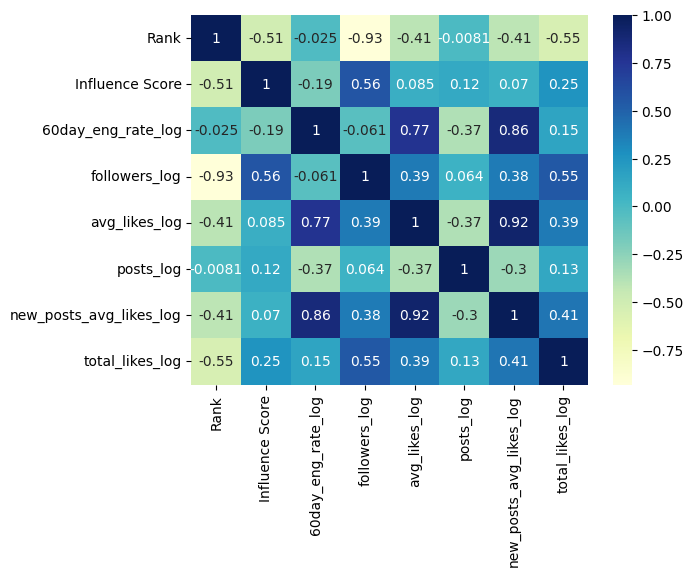

In [40]:
sns.heatmap(correlation_matrix, cmap="YlGnBu",annot=True)

##### Q.2) What is the frequency distribution of the following features?
   ○ Influence Score
   ○ Followers
   ○ Posts

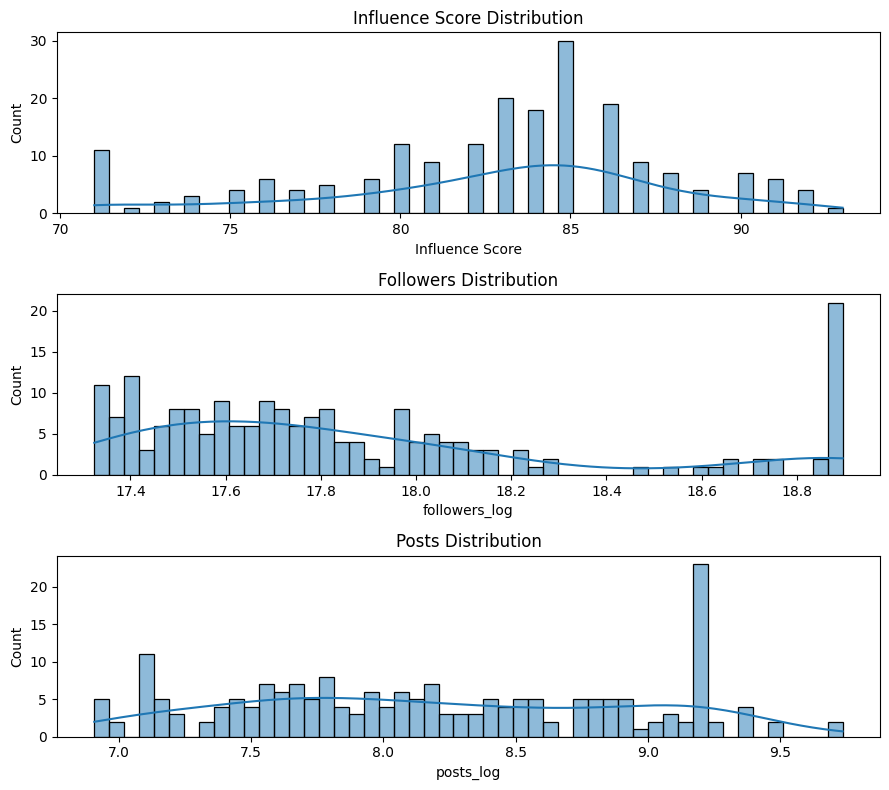

In [41]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(9, 8))

sns.histplot(df5['Influence Score'], kde=True, bins=50,ax=axes[0])
axes[0].set_title('Influence Score Distribution')

sns.histplot(df5['followers_log'], kde=True, bins=50,ax=axes[1])
axes[1].set_title('Followers Distribution')

sns.histplot(df5['posts_log'], kde=True, bins=50,ax=axes[2])
axes[2].set_title('Posts Distribution')

plt.tight_layout()
plt.show()

##### Q.3) Which country houses the highest number of Instagram Influencers? Please show the count of Instagram influencers in different countries using barchart.

In [42]:
country_count = df5['Country Or Region'].value_counts().index
country_count

Index(['United States', 'Brazil', 'India', 'Indonesia', 'France', 'Spain',
       'United Kingdom', 'Colombia', 'Canada', 'Mexico', 'Turkey',
       'Netherlands', 'Switzerland', 'Germany', 'Czech Republic',
       'British Virgin Islands', 'Sweden', 'Australia', 'Anguilla',
       'CÃ´te d'Ivoire', 'Puerto Rico', 'United Arab Emirates', 'Italy',
       'Uruguay', 'Russia'],
      dtype='object', name='Country Or Region')

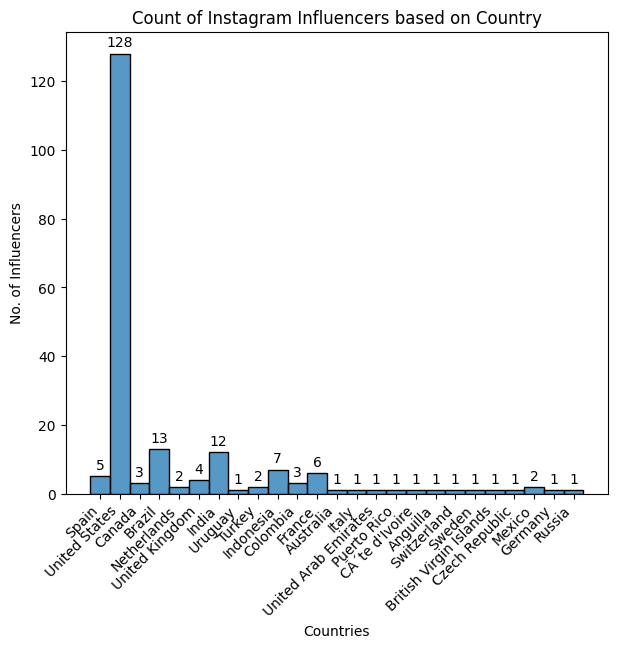

In [43]:
plt.figure(figsize=(7, 6))
ax = sns.histplot(data=df5, x='Country Or Region', bins=len(country_count), palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
    
plt.title('Count of Instagram Influencers based on Country')
plt.xlabel('Countries')
plt.ylabel('No. of Influencers')
plt.xticks(rotation=45, ha='right')
plt.show()

##### Q.4) Who are the top 10 influencers in the given dataset based on the following features ?
      ● Followers
      ● Average likes
      ● Total Likes

In [44]:
df_follower_count = df2.sort_values(by='Followers_1', ascending=False).head(10)
df_avg_likes_count = df2.sort_values(by='Avg. Likes_1', ascending=False).head(10)
df_total_likes_count = df2.sort_values(by='Total Likes_1', ascending=False).head(10)

Followers

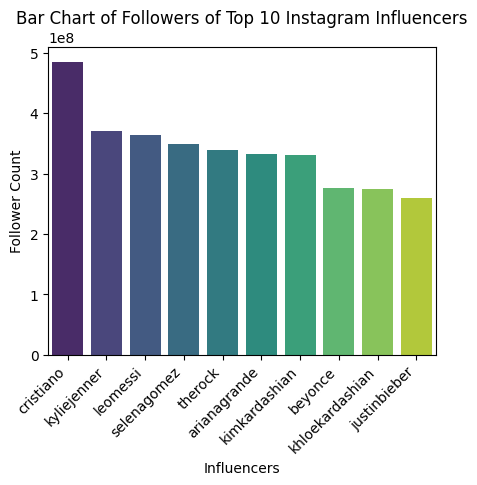

In [45]:
plt.figure(figsize=(5, 4))
sns.barplot(x='Channel Info', y='Followers_1', data=df_follower_count, palette='viridis')
plt.title('Bar Chart of Followers of Top 10 Instagram Influencers')
plt.xlabel('Influencers')
plt.ylabel('Follower Count')
plt.xticks(rotation=45, ha='right')
plt.show()

Avg Likes

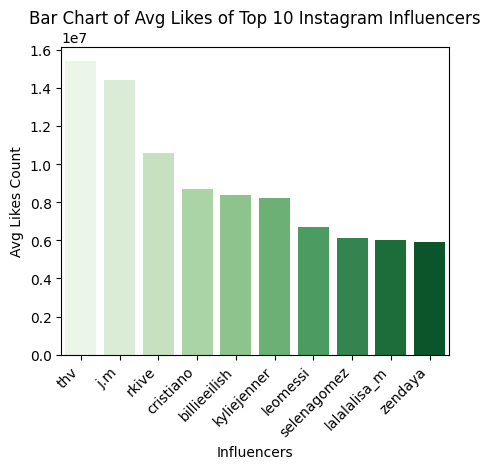

In [71]:
plt.figure(figsize=(5, 4))
sns.barplot(x='Channel Info', y='Avg. Likes_1', data=df_avg_likes_count, palette='Greens')
plt.title('Bar Chart of Avg Likes of Top 10 Instagram Influencers')
plt.xlabel('Influencers')
plt.ylabel('Avg Likes Count')
plt.xticks(rotation=45, ha='right')
plt.show()

Total Likes

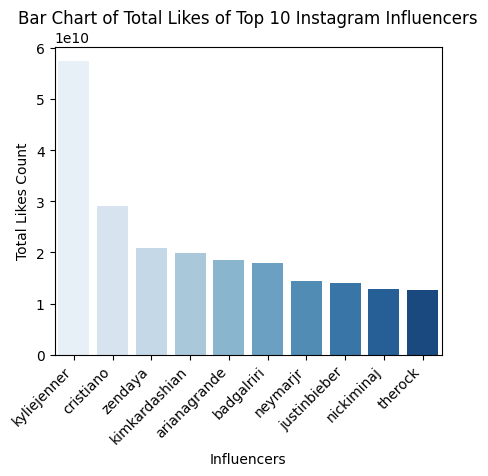

In [68]:
plt.figure(figsize=(5, 4))
sns.barplot(x='Channel Info', y='Total Likes_1', data=df_total_likes_count, palette='Blues')
plt.title('Bar Chart of Total Likes of Top 10 Instagram Influencers')
plt.xlabel('Influencers')
plt.ylabel('Total Likes Count')
plt.xticks(rotation=45, ha='right')
plt.show()

##### Q.5) Describe the relationship between the following pairs of features using a suitable graph ?
       ● Followers and Total Likes
       ● Followers and Influence Score
       ● Posts and Average likes
       ● Posts and Influence Score

Followers and Total Likes

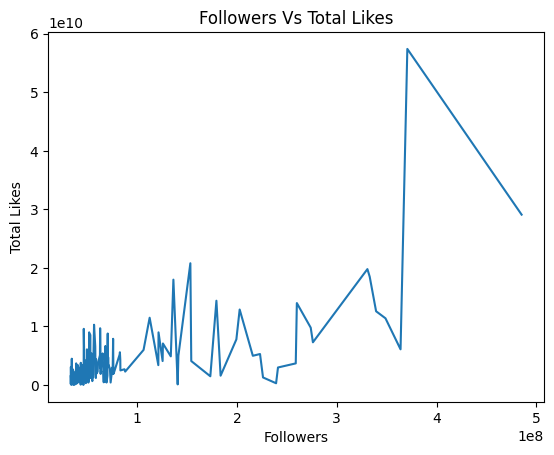

In [53]:
plt.plot(df2['Followers_1'], df2['Total Likes_1'])
plt.xlabel('Followers')
plt.ylabel('Total Likes')
plt.title('Followers Vs Total Likes')
plt.show()

Followers and Influence Score

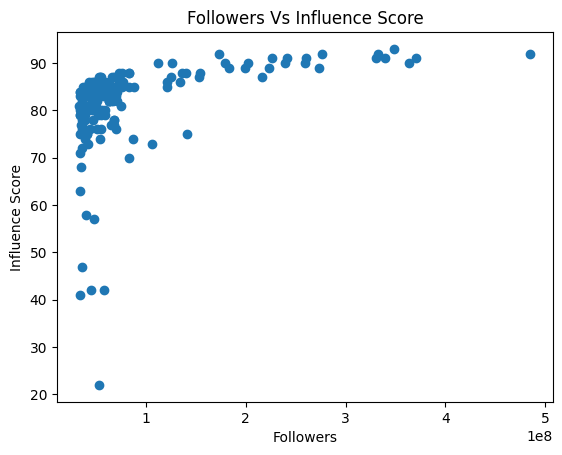

In [54]:
plt.scatter(data=df2,x='Followers_1',y='Influence Score')
plt.xlabel('Followers')
plt.ylabel('Influence Score')
plt.title('Followers Vs Influence Score')
plt.show()

Posts and Average Likes

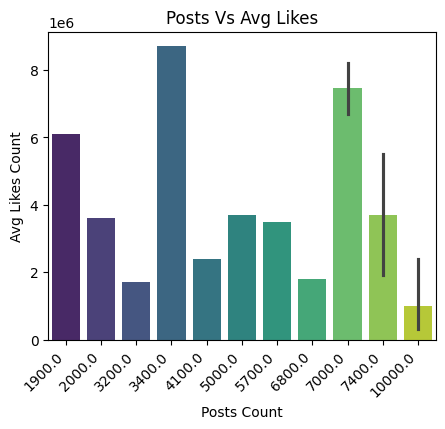

In [59]:
plt.figure(figsize=(5, 4))
sns.barplot(x='Posts_1', y='Avg. Likes_1', data=df2[:15], palette='viridis')
plt.title('Posts Vs Avg Likes')
plt.xlabel('Posts Count')
plt.ylabel('Avg Likes Count')
plt.xticks(rotation=45, ha='right')
plt.show()

Posts and Influence Score

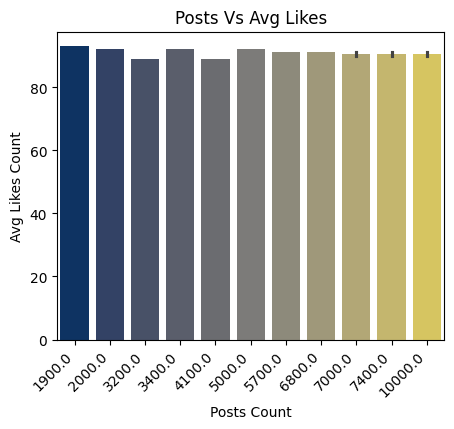

In [67]:
plt.figure(figsize=(5, 4))
sns.barplot(x='Posts_1', y='Influence Score', data=df2[:15], palette='cividis')
plt.title('Posts Vs Avg Likes')
plt.xlabel('Posts Count')
plt.ylabel('Avg Likes Count')
plt.xticks(rotation=45, ha='right')
plt.show()